# Linear Regression

In [4]:
import numpy as np
from numpy.random import rand
from numpy.random import normal
import matplotlib.pyplot as plt
import time

In [5]:
def gradient_descent(data, targets, theta=rand(2), alpha=0.001, epsilon=1e-9):
    """An implementation of the gradient descent algorithm.

    Returns two-dimensional model weights for y = mx + b in the form theta = (
    m, b), as well as a history of costs for plotting.

    Parameters
    ----------
    data : array-like, shape = (n_samples)
           Test samples.

    labels : array like, shape = (n_samples)
             Noisy targets for data.

    theta : array-like, shape = (2)
            An initial guess to the model weights.

    alpha : float
            Learning rate.

    epsilon : float
              Stopping criterion.

    Returns
    -------
    theta : array-like, shape = (2)
            Correct model weights.

    costs : array-like, shape = (n_steps)
            History of costs over the runtime of the algorithm.
    """
    # Prepend data instances with 1 in the 0th index
    data = np.insert(data, 0, 1, axis=1)
    
    # Gradient descent
    scaler = 2 * len(data)
    delta_cost = 1
    costs = []
    first = True
    while delta_cost > epsilon:
    
        # Calculating residual
        residual = np.ravel((data @ theta) - targets.T)
    
        # Updating theta
        theta = theta - alpha * (residual @ data) / scaler
    
        # Computing LMS cost function
        cost = np.sum(np.power(residual, 2)) / scaler
    
        # Checking delta_cost
        if first:
            delta_cost = abs(cost)
            first = False
        else:
            delta_cost = abs(costs[-1] - cost)
    
        # Update costs history
        costs.append(cost)
    
    return theta, costs

Algorithm runtime: 0.9300 seconds


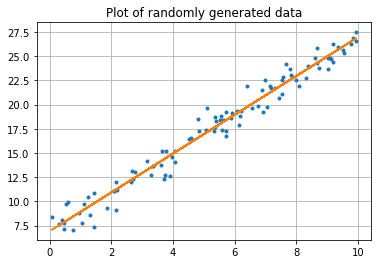

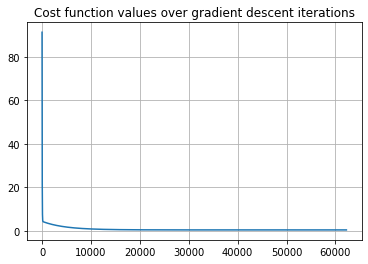

In [6]:
# Data definition
b = 7
m = 2
n = 100
X = rand(n, 1) * 10
Y = ((m * X + b).T + normal(size=len(X))).T

# Gradient descent algorithm
start = time.time()
theta, costs = gradient_descent(X, Y)
print('Algorithm runtime: {:.4f} seconds'.format(time.time() - start))

# Plotting
plt.figure()
plt.plot(X, Y, '.')
plt.title('Plot of randomly generated data')
plt.plot(X, theta[1]*X + theta[0])
plt.grid()

plt.figure()
plt.plot(costs)
plt.grid()
plt.title('Cost function values over gradient descent iterations')
plt.show()

## Random Linear Classifier Algorithm

In [7]:
import numpy as np
from numpy.random import rand
from numpy.random import normal
import matplotlib.pyplot as plt
import time